In [19]:
from numpy import linspace, arange, zeros
from control import c2d, tf
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math


In [155]:
T = 0.2

Gs = tf(1, [1, 2])

Gz = c2d(Gs, T)

print('Gz = \n', Gz)

Gz = 
 
  0.1648
----------
z - 0.6703

dt = 0.2



In [156]:
GHs = tf(1,[1,2,0])

GHz = c2d(GHs, T)

print('GHz = \n', GHz)

GHz = 
 
 0.01758 z + 0.01539
---------------------
z^2 - 1.67 z + 0.6703

dt = 0.2



In [157]:
Fs = tf(1, [1, 0])

Fz = c2d(Fs, T)

print('Fz = \n', Fz)

Fz = 
 
 0.2
-----
z - 1

dt = 0.2



In [158]:
zeta = 0.6
wn = 4

In [89]:
z_ang = T*wn*np.sqrt(1-(zeta**2))
print(z_ang)

0.6400000000000001


In [90]:
z_mod = np.exp(-T*zeta*wn)
print(z_mod)

0.6187833918061408


In [91]:
z_rect = cmath.rect(z_mod, z_ang)
print(z_rect)

(0.4963235336169597+0.3695346207773863j)


In [92]:
alpha_tf = tf([1,+0.6],1,T)
print(alpha_tf)


z + 0.6
-------
   1

dt = 0.2



In [144]:
angle = -np.pi - cmath.phase(GHz(z_rect)) 
test = cmath.phase(alpha_tf(z_rect))
print(math.degrees(test))
print(angle)
angle_degrees = math.degrees(angle)
f'angulo em graus: {angle_degrees}'

18.62727009110492
-5.168463820607645


'angulo em graus: -296.1311634868787'

In [154]:
alpha = -0.6
z1 = z_rect
numGHz = GHz.num[0][0];
denGHz = GHz.den[0][0];
numGc = [1, alpha];
phi2 = np.angle(np.polyval(numGHz,z1))+np.angle(np.polyval(numGc,z1))-np.angle(np.polyval(denGHz,z1));
phiB = -np.pi-phi2;
beta = (np.imag(z1)-np.real(z1)*np.tan(-phiB))/np.tan(-phiB);

print(beta)

-0.08306705601996578


In [145]:
beta_prof = (z_rect.imag - (z_rect.real*math.tan(angle))/math.tan(angle))
print('beta formula prof = ', beta_prof)

beta formula prof =  -0.1267889128395734


In [146]:
#angle = np.pi - cmath.phase(GHz(z_rect)) - cmath.phase(alpha_tf(z_rect))
#print(angle)
#angle_degrees = math.degrees(angle)
#f'angulo em graus: {angle_degrees}'

In [147]:
controler = tf([1,-0.6],[1,beta_prof],T)
print(controler)


 z - 0.6
----------
z - 0.1268

dt = 0.2



In [148]:
FTMA = controler * GHz

In [149]:
Kc = 1/np.abs(FTMA(z_rect))
print(Kc)

13.912201011594394


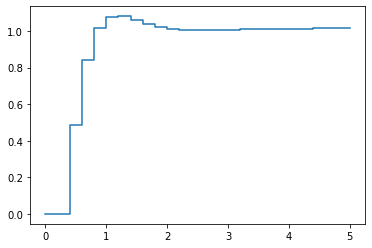

In [165]:
#Equacoes recursivas 

#G
#c[k] = 0.6703*c[k-1] + 0.1648*u[k-1]

#GH
#v[k] = 1,67*v[k-1] - 0.6703*v[k-2] + 0.01758*u[k-1] + 0.01539*u[k-2]

#F
#x[k] = x[k-1] + 0.2*r[k-1]

#C
#u[k] = 14.76*e[k] -8.856*e[k-1] - 0.083*u[k-1]

#e = x - v

Tf = 5
kmax = int(Tf/T)+1

t = T*arange(0,kmax)
r = np.ones(kmax)

c = np.zeros(kmax)
v = np.zeros(kmax)
x = np.zeros(kmax)
e = np.zeros(kmax)
u = np.zeros(kmax)

k = 1

c[k] = 0.6703*c[k-1] + 0.1648*u[k-1]
v[k] = 1.67*v[k-1] + 0.01758*u[k-1]
x[k] = x[k-1] + 0.2*r[k-1]
e[k] = x[k] - v[k]
u[k] = 14.76*e[k] -8.856*e[k-1] - 0.083*u[k-1]

for k in range(2, kmax):
    c[k] = 0.6703*c[k-1] + 0.1648*u[k-1]
    v[k] = 1.67*v[k-1] - 0.6703*v[k-2] + 0.01758*u[k-1] + 0.01539*u[k-2]
    x[k] = x[k-1] + 0.2*r[k-1]
    e[k] = x[k] - v[k]
    u[k] = 14.76*e[k] -8.856*e[k-1] - 0.083*u[k-1]
    
plt.plot(t,c,ds='steps-post')